### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,\
                            precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

### Problem statement : E Commerce - Customer Churn Prediction

Feature Name ::	Description

CustomerID:: 	Unique customer ID

Tenure:: 	Tenure of the customer in the organization

PreferredLoginDevice:: 	Preferred device used by the customer to login (e.g., mobile, web)

CityTier:: 	City tier classification (e.g., Tier 1, Tier 2, Tier 3)

WarehouseToHome:: 	Distance between the warehouse and the customer's home

PreferredPaymentMode:: 	Preferred payment method used by the customer (e.g., credit card, debit card, cash on delivery)

Gender:: 	Gender of the customer

HourSpendOnApp:: 	Number of hours spent on the mobile application or website

NumberOfDeviceRegistered:: 	Total number of devices registered to the customer's account

PreferedOrderCat:: 	Preferred order category of the customer in the last month

SatisfactionScore:: 	Customer's satisfaction score with the service

MaritalStatus:: 	Marital status of the customer

NumberOfAddress:: 	Total number of addresses added to the customer's account

OrderAmountHikeFromlastYear::Percentage increase in order value compared to last year

CouponUsed:: Total number of coupons used by the customer in the last month

OrderCount:: 	Total number of orders placed by the customer in the last month

DaySinceLastOrder:: 	Number of days since the customer's last order

CashbackAmount:: 	Average cashback received by the customer in the last month
        
Churn:: 	Flag indicating whether the customer is going to churn (1) or not (0)
Whether the customer will stop using the ecommerce platform

### Step 1 Data Gathering

In [3]:
df = pd.read_csv('C:/Users/Ranesh/OneDrive/Desktop/Datasets/Datasets/E_Commerce_data.csv')
df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123


### Step 2 Read and Explore the data

In [4]:
#brief information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
#check the shape of the dataset
print(df.shape)

(5630, 20)


1. From the above cells we can see that the data contains records of 5630 customers with 20 features.

2. Another thing to note is that there are missing values in some of the columns which will be handled 
   later when building the model.

3. Here I will just focus on the exploration of the data, as pandas and matplotlib always skip null      values during operation.

4. I discovered that the columns with data type of float64, are the continuous varibles, and the rest    are discrete

In [6]:
#print summary statistics of the data including the categorical columns
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,5630,NaN,NaN,NaN,52815.5,1625.39,50001,51408.2,52815.5,54222.8,55630
Churn,5630,NaN,NaN,NaN,0.168384,0.37424,0,0,0,0,1
Tenure,5366,NaN,NaN,NaN,10.1899,8.55724,0,2,9,16,61
PreferredLoginDevice,5630,3,Mobile Phone,2765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,5630,NaN,NaN,NaN,1.65471,0.915389,1,1,1,3,3
WarehouseToHome,5379,NaN,NaN,NaN,15.6399,8.53148,5,9,14,20,127
PreferredPaymentMode,5630,7,Debit Card,2314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,5630,2,Male,3384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HourSpendOnApp,5375,NaN,NaN,NaN,2.93153,0.721926,0,2,3,3,5
NumberOfDeviceRegistered,5630,NaN,NaN,NaN,3.68899,1.024,1,3,4,4,6


In [7]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [8]:
count_col = []
hist_col = []
for column in df.columns:
    unique_value = df[column].nunique()
    if unique_value <= 20:
        count_col.append(column)
    else:
        hist_col.append(column)   

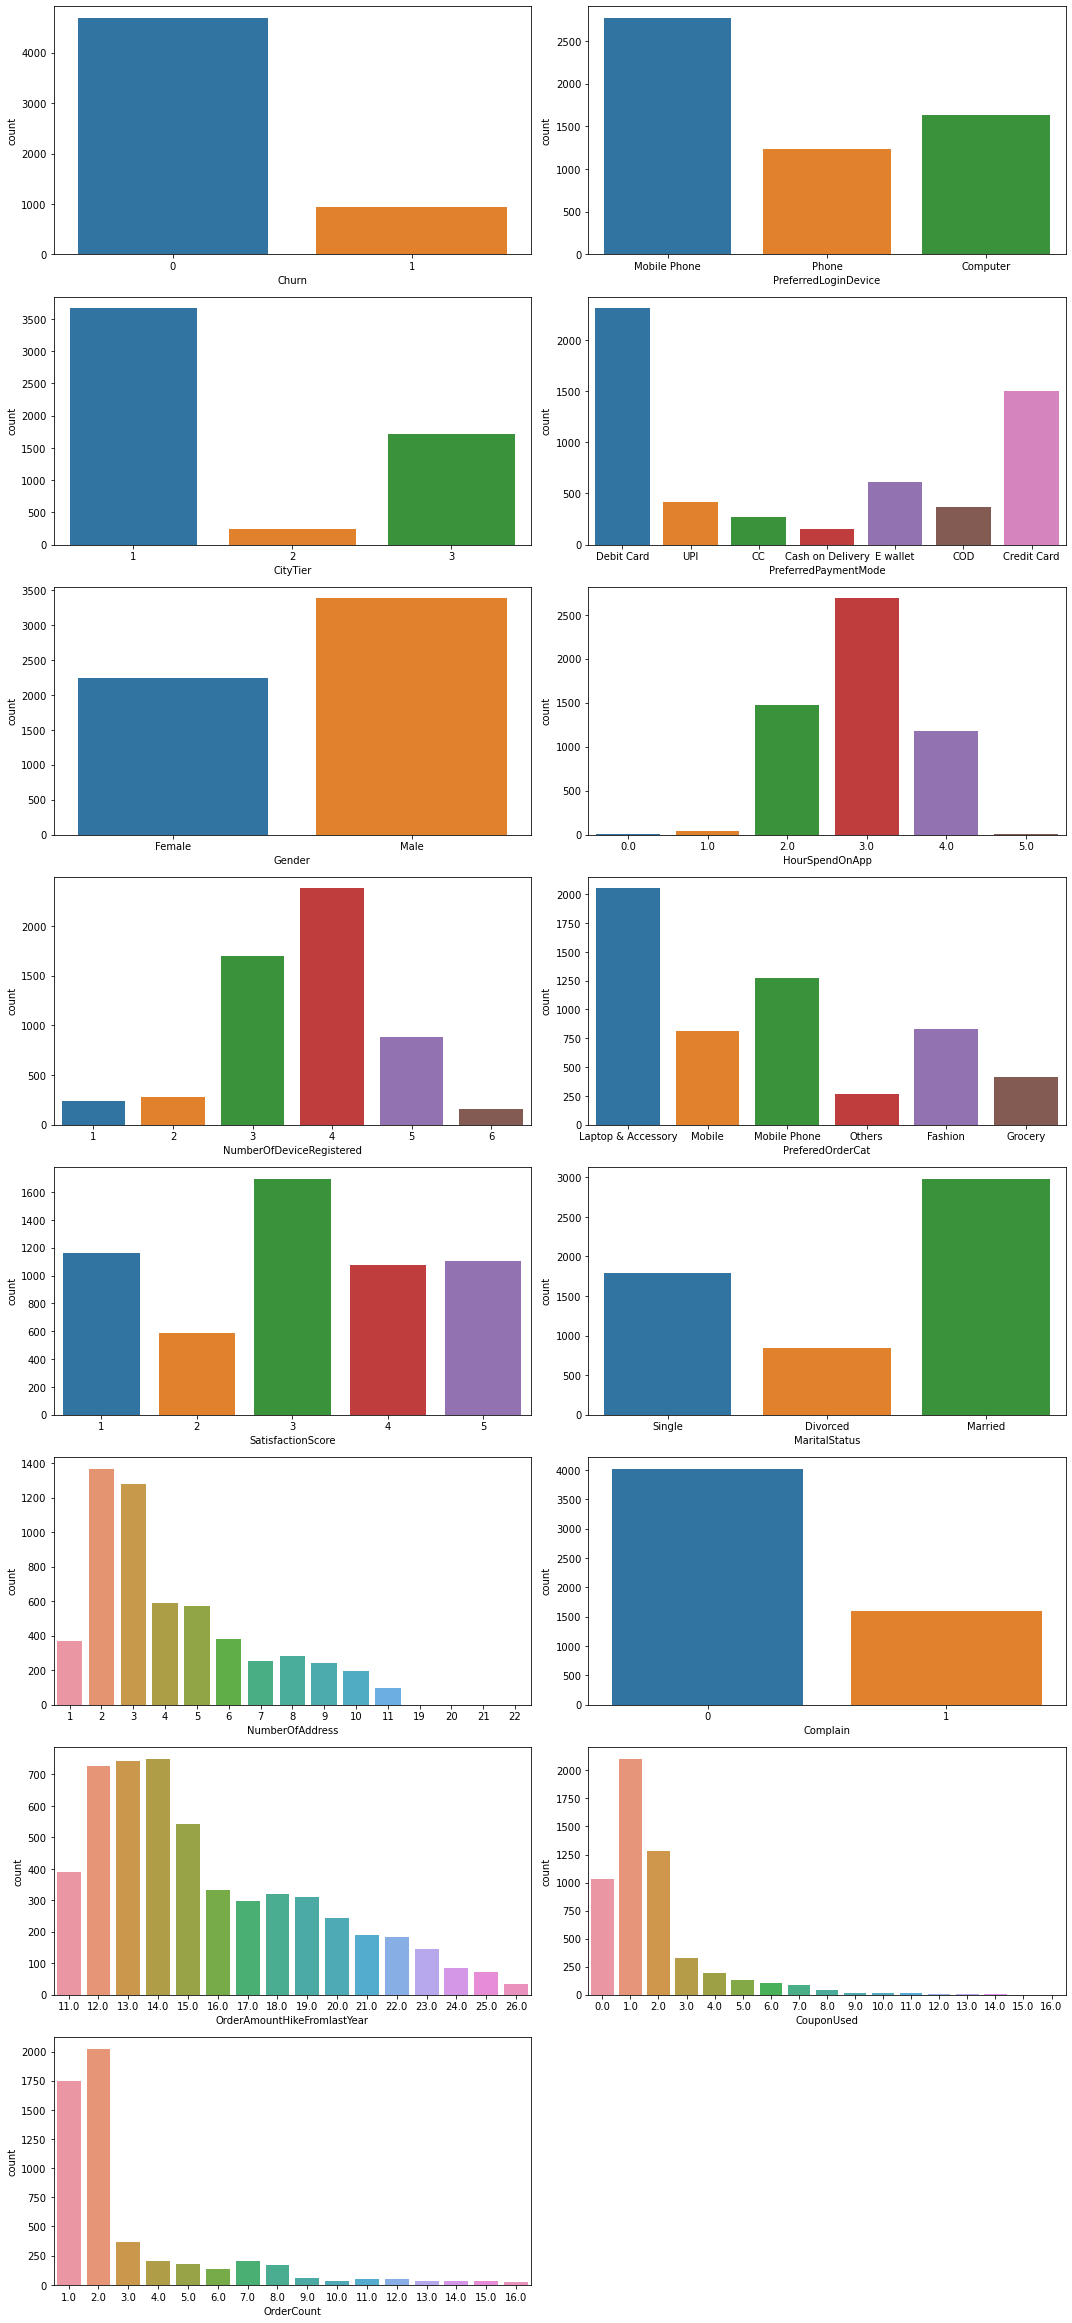

In [9]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    plt.subplot(10,2,plot_num)
    sns.countplot(data=df, x=col)
    plot_num += 1
    plt.tight_layout()

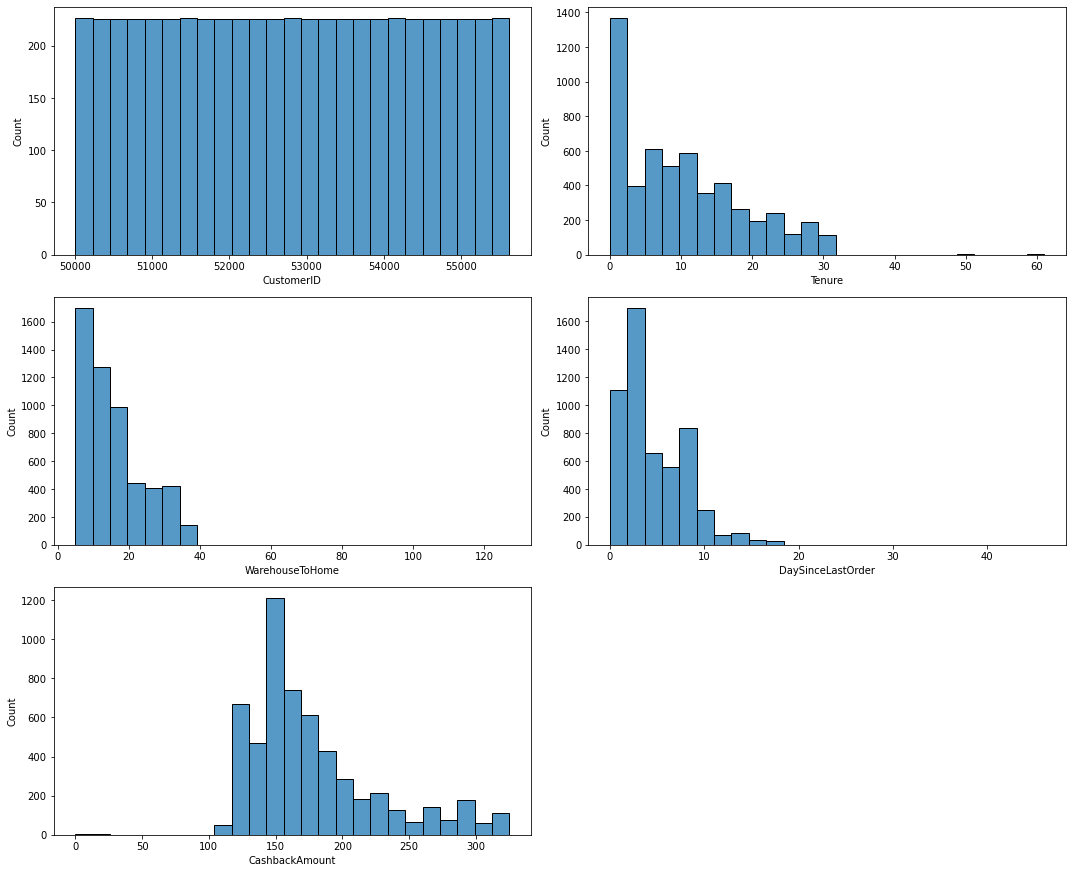

In [10]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in hist_col:
    plt.subplot(10,2,plot_num)
    sns.histplot(data=df, x=col,bins=25)
    plot_num += 1
    plt.tight_layout()

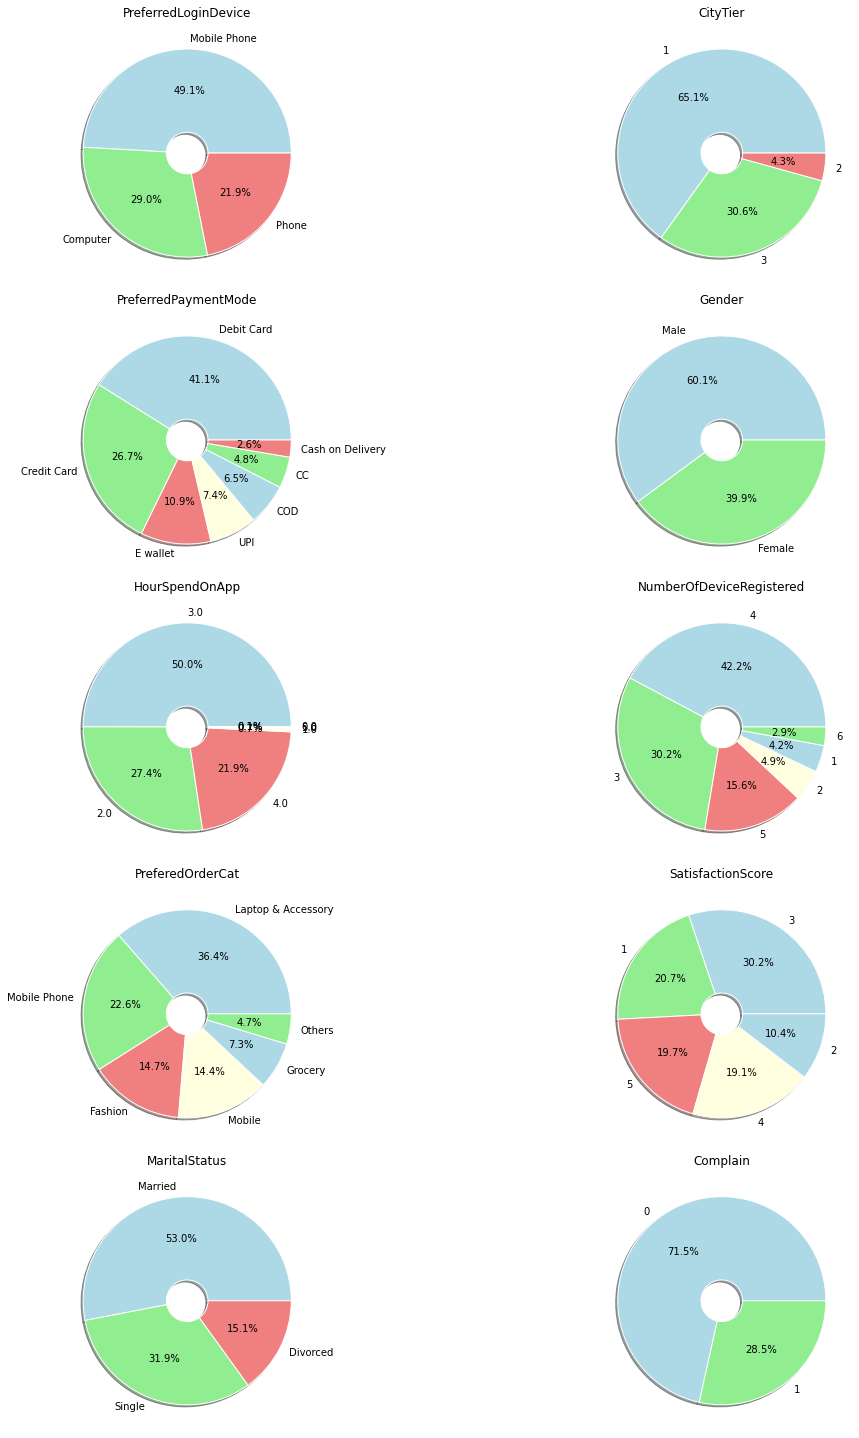

In [11]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    if df[col].nunique() <= 8 and col != "Churn":
        plt.subplot(10,2,plot_num)
        plt.pie(data=df, x=df[col].value_counts().values,labels=df[col].value_counts().index,shadow=True,autopct='%1.1f%%',
               colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'],wedgeprops=dict(width=0.8,edgecolor="w") )
        plt.title(col)
        plot_num += 1
        plt.tight_layout()

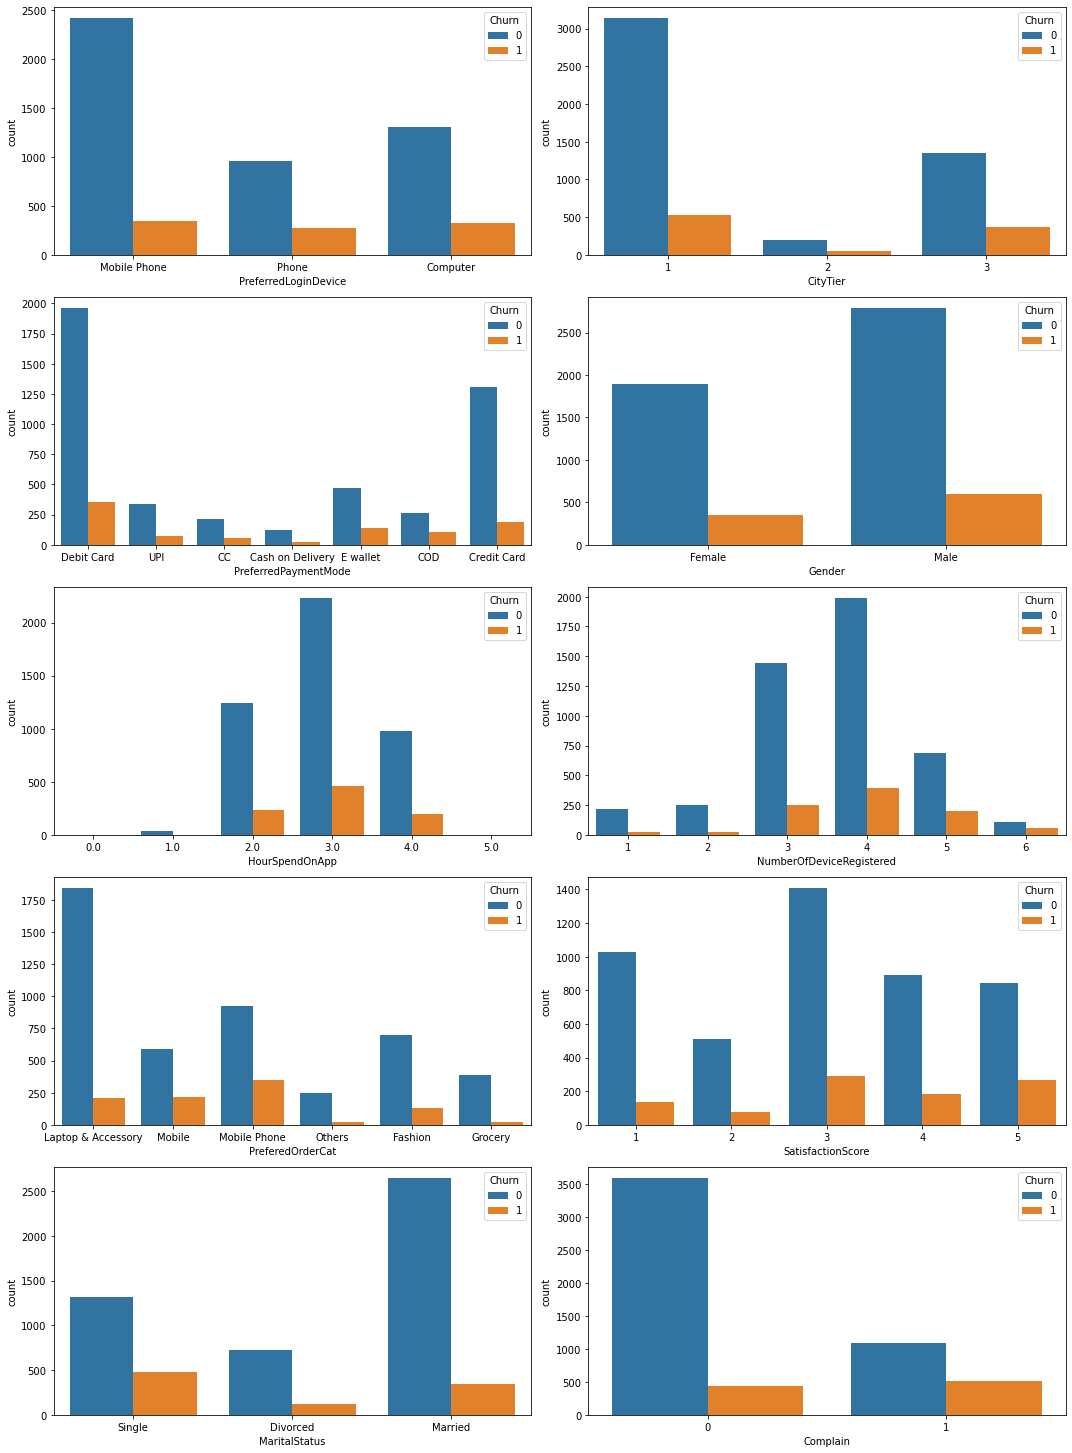

In [12]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    if df[col].nunique() <= 8 and col != "Churn":
        plt.subplot(10,2,plot_num)
        sns.countplot(data=df, x=col, hue="Churn")
        plot_num += 1
        plt.tight_layout()

<AxesSubplot:xlabel='CashbackAmount'>

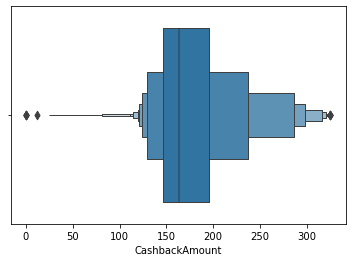

In [13]:
sns.boxenplot(data=df,x="CashbackAmount")

### Missing Value Treatment

In [14]:
#count the number of missing values across each columns
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [15]:
df.isnull().sum()*100/len(df)

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

#### Null Value Imputation

In [16]:
Numerical_columns = ['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']

for column in list(Numerical_columns):
    df[column].fillna(df[column].median(),inplace = True)

In [17]:
df.isnull().sum()*100/len(df)

CustomerID                     0.0
Churn                          0.0
Tenure                         0.0
PreferredLoginDevice           0.0
CityTier                       0.0
WarehouseToHome                0.0
PreferredPaymentMode           0.0
Gender                         0.0
HourSpendOnApp                 0.0
NumberOfDeviceRegistered       0.0
PreferedOrderCat               0.0
SatisfactionScore              0.0
MaritalStatus                  0.0
NumberOfAddress                0.0
Complain                       0.0
OrderAmountHikeFromlastYear    0.0
CouponUsed                     0.0
OrderCount                     0.0
DaySinceLastOrder              0.0
CashbackAmount                 0.0
dtype: float64

### Feature Engineering

#### Checking Unique Value in Each Column

In [18]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("")

CustomerID
[50001 50002 50003 ... 55628 55629 55630]

Churn
[1 0]

Tenure
[ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]

PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']

CityTier
[3 1 2]

WarehouseToHome
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]

PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender
['Female' 'Male']

HourSpendOnApp
[3. 2. 1. 0. 4. 5.]

NumberOfDeviceRegistered
[3 4 5 2 1 6]

PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

SatisfactionScore
[2 3 5 4 1]

MaritalStatus
['Single' 'Divorced' 'Married']

NumberOfAddress
[ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]

Complain
[1 0]

OrderAmountHikeFromlastYear
[11. 15. 14. 23. 22. 16. 12. 13

### Categorical Encoding¶

Here I will encode the categorical variables as numeric variables, since machine learning algorithms work on numbers and not text. I will use the pandas get_dummies function which applies one-hot encoding to all the variables passed to it.


In [19]:
cat_df = df.select_dtypes(include="O")

In [20]:
categorical_cols = cat_df.columns

In [21]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [22]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

### Building the Pipeline

In [23]:
cat_col = X.select_dtypes(include="O").columns
num_col = []
for col in X.columns:
    if col not in cat_col:
        num_col.append(col)

In [24]:
categorical_col = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="most_frequent")),
    ('encoding',OneHotEncoder())
])

In [25]:
numerical_col = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="median")),
    ('scaler',StandardScaler())
])

In [26]:
transformer = ColumnTransformer(transformers=[
    ('categorical_col', categorical_col, cat_col),    
    ('numerical_col', numerical_col, num_col)
])

In [27]:
classifier = XGBClassifier()

In [28]:
model = Pipeline([
    ('transformer',transformer),
    ('classifier',classifier)
])

### Train Test split of the data

In [29]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Fit and Evaluate model

In [30]:
model.fit(X_train,y_train)

[11:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('categorical_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder())]),
                                                  Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')),
                                                 ('numerical_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImpu...
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
    

In [31]:
y_pred = model.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred)*100

97.33570159857904

### Try different parameters to identify best ones

In [33]:
param_grid = {
    'classifier__n_estimators': [350],
    'classifier__learning_rate': [0.09],
    'classifier__max_depth': [25],
    'classifier__min_child_weight': [1],
    'classifier__subsample': [0.9],
    'classifier__colsample_bytree': [1.0],
    'classifier__lambda': [1]
}

In [34]:
grid_cv = GridSearchCV(model,param_grid, scoring='accuracy', cv=5, verbose =1, n_jobs=-1)

In [35]:
grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[11:04:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('categorical_col',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoding',
                                                                                          OneHotEncoder())]),
                                                                         Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')),
                                                                        ('numerical_col',
                                                                         Pipeline(...
      

In [36]:
grid_cv.best_params_

{'classifier__colsample_bytree': 1.0,
 'classifier__lambda': 1,
 'classifier__learning_rate': 0.09,
 'classifier__max_depth': 25,
 'classifier__min_child_weight': 1,
 'classifier__n_estimators': 350,
 'classifier__subsample': 0.9}

### Evaluate the model with best parameters

In [38]:
y_pred = grid_cv.predict(X_test)

In [40]:
conf_matrix = confusion_matrix(y_test,y_pred)
acc_score = accuracy_score(y_test, y_pred)*100
precision_score = precision_score(y_test,y_pred)
recall_score = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)
print("Confusion Matrix::")
print(conf_matrix)
print("\n")
print("Accuracy Score:",acc_score,'\n')
print("Classification Report::")
print("\n")
print(classification_report(y_test,y_pred))
print("Precision score :",precision_score*100,'\n')
print("Recall score :",recall_score*100,'\n')
print("f1 score :",f1_score*100,'\n')


Confusion Matrix::
[[939   2]
 [ 20 165]]


Accuracy of XGB Classifier: 98.04618117229128 

Classification Report::


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       941
           1       0.99      0.89      0.94       185

    accuracy                           0.98      1126
   macro avg       0.98      0.94      0.96      1126
weighted avg       0.98      0.98      0.98      1126

Precision score : 98.80239520958084 

Recall score : 89.1891891891892 

f1 score : 93.75 

